In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import math
import os
import librosa
import librosa.display
import IPython.display as ipd

## Visualisation

### Original signal

In [470]:
b0_file = 'genres/blues/blues.00000.wav'
b0, sr = librosa.load(b0_file)

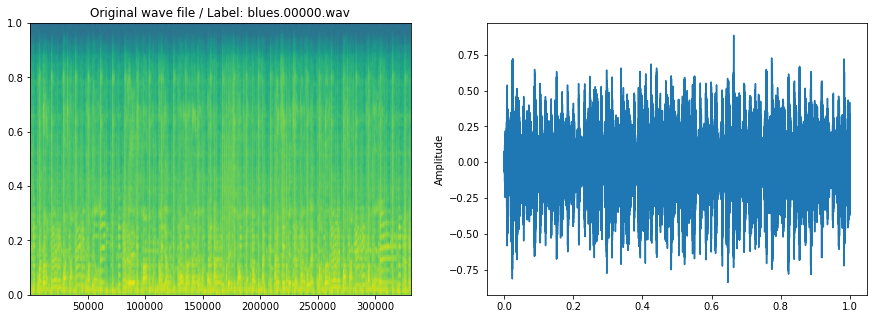

In [472]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str):  
    
    label = str(fpath).split('/')[-1].split('_')[0]
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].title.set_text(f'{title} / Label: {label}')
    ax[0].specgram(data,Fs=2)
    ax[1].set_ylabel('Amplitude')

    return ax[1].plot(np.linspace(0,1,len(data)), data)
  

#plotting the spectrogram and wave graph for the original signal
plot_spec(b0,sr,'Original wave file',b0_file)
ipd.Audio(data=b0,rate=sr)

### Noisy signal

In this part, we're adding white noise to the signal. White noises are random samples distributed at regular intervals with mean of 0 and standard deviation of 1.

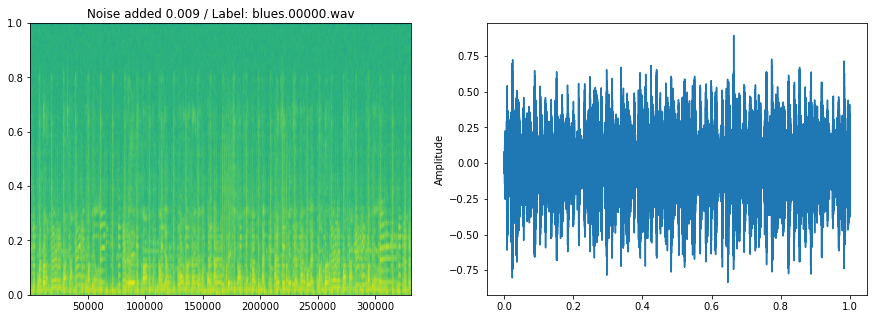

In [2272]:
noisy_b0 = b0 + 0.009*np.random.normal(0,1,len(b0))
plot_spec(noisy_b0,sr,'Noise added 0.009',b0_file)
ipd.Audio(data=noisy_b0,rate=sr)

### Signal with time shift

Here, we're moving the waveform to the right by sample_rate/10 factor along the time axis.

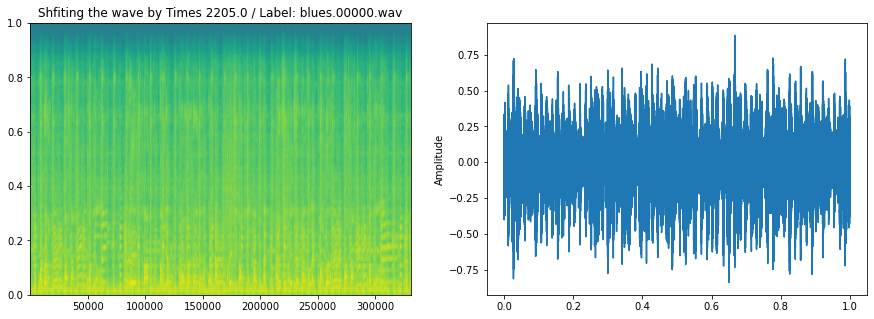

In [2273]:
time_shifted_b0 = np.roll(b0,int(sr/10))
plot_spec(time_shifted_b0,sr,f'Shfiting the wave by Times {sr/10}',b0_file)
ipd.Audio(data=time_shifted_b0,rate=sr)

### Signal with pitch shift

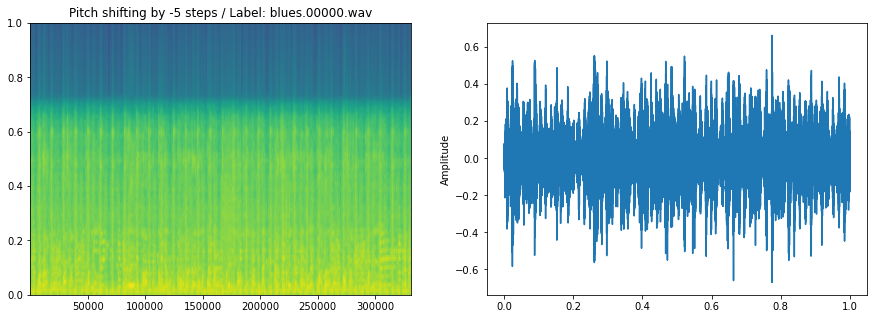

In [473]:
pitch_shifted_b0 = librosa.effects.pitch_shift(b0,sr,n_steps=-5)
plot_spec(pitch_shifted_b0, sr, f'Pitch shifting by {-5} steps', b0_file)
ipd.Audio(pitch_shifted_b0, rate = sr)

## Creating new dataframes

### By adding noise

In [2292]:
DATASET_PATH = "genres"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_new_features(dataset_path, json_path, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts features from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save features
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        """

    # dictionary to store filename, label, and sound features
    data = {
        "filename" : [],
        "label": [],
        "chroma_stft1": [],
        "chroma_stft2": [],
        "chroma_stft3": [],
        "chroma_stft4": [],
        "chroma_stft5": [],
        "chroma_stft6": [],
        "chroma_stft7": [],
        "chroma_stft8": [],
        "chroma_stft9": [],
        "chroma_stft10": [],
        "chroma_stft11": [],
        "chroma_stft12": [],
        "chroma_cqt1": [],
        "chroma_cqt2": [],
        "chroma_cqt3": [],
        "chroma_cqt4": [],
        "chroma_cqt5": [],
        "chroma_cqt6": [],
        "chroma_cqt7": [],
        "chroma_cqt8": [],
        "chroma_cqt9": [],
        "chroma_cqt10": [],
        "chroma_cqt11": [],
        "chroma_cqt12": [],
        "chroma_cens1": [],
        "chroma_cens2": [],
        "chroma_cens3": [],
        "chroma_cens4": [],
        "chroma_cens5": [],
        "chroma_cens6": [],
        "chroma_cens7": [],
        "chroma_cens8": [],
        "chroma_cens9": [],
        "chroma_cens10": [],
        "chroma_cens11": [],
        "chroma_cens12": [],
        "rms": [],
        "spectral_centroid": [], 
        "spectral_bandwidth": [], 
        "spectral_flatness": [],
        "spectral_rolloff": [],
        "spectral_contrast1": [],
        "spectral_contrast2": [],
        "spectral_contrast3": [],
        "spectral_contrast4": [],
        "spectral_contrast5": [],
        "spectral_contrast6": [],
        "spectral_contrast7": [],
        "poly_features1": [],
        "poly_features2": [],
        "tonnetz1": [],
        "tonnetz2": [],
        "tonnetz3": [],
        "tonnetz4": [],
        "tonnetz5": [],
        "tonnetz6": [],
        "zero_crossing_rate": [],
        "mfcc1": [],
        "mfcc2": [],
        "mfcc3": [],
        "mfcc4": [],
        "mfcc5": [],
        "mfcc6": [],
        "mfcc7": [],
        "mfcc8": [],
        "mfcc9": [],
        "mfcc10": [],
        "mfcc11": [],
        "mfcc12": [],
        "mfcc13": [],
        "mfcc14": [],
        "mfcc15": [],
        "mfcc16": [],
        "mfcc17": [],
        "mfcc18": [],
        "mfcc19": [],
        "mfcc20": [],
        "mfcc21": [],
        "mfcc22": [],
        "mfcc23": [],
        "mfcc24": [],
        "mfcc25": [],
        "mfcc26": [],
        "mfcc27": [],
        "mfcc28": [],
        "mfcc29": [],
        "mfcc30": [],
        "mfcc31": [],
        "mfcc32": [],
        "mfcc33": [],
        "mfcc34": [],
        "mfcc35": [],
        "mfcc36": [],
        "mfcc37": [],
        "mfcc38": [],
        "mfcc39": [],
        "mfcc40": [],
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # shows genre label (i.e., sub-folder name) when collecting data
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

            # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            #adding noise
                noisy_signal = signal + 0.009*np.random.normal(0,1,len(signal))

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract spectral features
                    chroma_stft1 = librosa.feature.chroma_stft(noisy_signal[start:finish])[0].mean()
                    chroma_stft1 = chroma_stft1.T
                    chroma_stft2 = librosa.feature.chroma_stft(noisy_signal[start:finish])[1].mean()
                    chroma_stft2 = chroma_stft2.T
                    chroma_stft3 = librosa.feature.chroma_stft(noisy_signal[start:finish])[2].mean()
                    chroma_stft3 = chroma_stft3.T
                    chroma_stft4 = librosa.feature.chroma_stft(noisy_signal[start:finish])[3].mean()
                    chroma_stft4 = chroma_stft4.T
                    chroma_stft5 = librosa.feature.chroma_stft(noisy_signal[start:finish])[4].mean()
                    chroma_stft5 = chroma_stft5.T
                    chroma_stft6 = librosa.feature.chroma_stft(noisy_signal[start:finish])[5].mean()
                    chroma_stft6 = chroma_stft6.T
                    chroma_stft7 = librosa.feature.chroma_stft(noisy_signal[start:finish])[6].mean()
                    chroma_stft7 = chroma_stft7.T
                    chroma_stft8 = librosa.feature.chroma_stft(noisy_signal[start:finish])[7].mean()
                    chroma_stft8 = chroma_stft8.T
                    chroma_stft9 = librosa.feature.chroma_stft(noisy_signal[start:finish])[8].mean()
                    chroma_stft9 = chroma_stft9.T
                    chroma_stft10 = librosa.feature.chroma_stft(noisy_signal[start:finish])[9].mean()
                    chroma_stft10 = chroma_stft10.T
                    chroma_stft11 = librosa.feature.chroma_stft(noisy_signal[start:finish])[10].mean()
                    chroma_stft11 = chroma_stft11.T
                    chroma_stft12 = librosa.feature.chroma_stft(noisy_signal[start:finish])[11].mean()
                    chroma_stft12 = chroma_stft12.T
                    
                    chroma_cqt1 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[0].mean()
                    chroma_cqt1 = chroma_cqt1.T
                    chroma_cqt2 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[1].mean()
                    chroma_cqt2 = chroma_cqt2.T
                    chroma_cqt3 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[2].mean()
                    chroma_cqt3 = chroma_cqt3.T
                    chroma_cqt4 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[3].mean()
                    chroma_cqt4 = chroma_cqt4.T
                    chroma_cqt5 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[4].mean()
                    chroma_cqt5 = chroma_cqt5.T
                    chroma_cqt6 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[5].mean()
                    chroma_cqt6 = chroma_cqt6.T
                    chroma_cqt7 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[6].mean()
                    chroma_cqt7 = chroma_cqt7.T
                    chroma_cqt8 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[7].mean()
                    chroma_cqt8 = chroma_cqt8.T
                    chroma_cqt9 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[8].mean()
                    chroma_cqt9 = chroma_cqt9.T
                    chroma_cqt10 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[9].mean()
                    chroma_cqt10 = chroma_cqt10.T
                    chroma_cqt11 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[10].mean()
                    chroma_cqt11 = chroma_cqt11.T
                    chroma_cqt12 = librosa.feature.chroma_cqt(noisy_signal[start:finish])[11].mean()
                    chroma_cqt12 = chroma_cqt12.T
                    
                    chroma_cens1 = librosa.feature.chroma_cens(noisy_signal[start:finish])[0].mean()
                    chroma_cens1 = chroma_cens1.T
                    chroma_cens2 = librosa.feature.chroma_cens(noisy_signal[start:finish])[1].mean()
                    chroma_cens2 = chroma_cens2.T
                    chroma_cens3 = librosa.feature.chroma_cens(noisy_signal[start:finish])[2].mean()
                    chroma_cens3 = chroma_cens3.T
                    chroma_cens4 = librosa.feature.chroma_cens(noisy_signal[start:finish])[3].mean()
                    chroma_cens4 = chroma_cens4.T
                    chroma_cens5 = librosa.feature.chroma_cens(noisy_signal[start:finish])[4].mean()
                    chroma_cens5 = chroma_cens5.T
                    chroma_cens6 = librosa.feature.chroma_cens(noisy_signal[start:finish])[5].mean()
                    chroma_cens6 = chroma_cens6.T
                    chroma_cens7 = librosa.feature.chroma_cens(noisy_signal[start:finish])[6].mean()
                    chroma_cens7 = chroma_cens7.T
                    chroma_cens8 = librosa.feature.chroma_cens(noisy_signal[start:finish])[7].mean()
                    chroma_cens8 = chroma_cens8.T
                    chroma_cens9 = librosa.feature.chroma_cens(noisy_signal[start:finish])[8].mean()
                    chroma_cens9 = chroma_cens9.T
                    chroma_cens10 = librosa.feature.chroma_cens(noisy_signal[start:finish])[9].mean()
                    chroma_cens10 = chroma_cens10.T
                    chroma_cens11 = librosa.feature.chroma_cens(noisy_signal[start:finish])[10].mean()
                    chroma_cens11 = chroma_cens11.T
                    chroma_cens12 = librosa.feature.chroma_cens(noisy_signal[start:finish])[11].mean()
                    chroma_cens12 = chroma_cens12.T
                    
                    rms = librosa.feature.rms(noisy_signal[start:finish]).mean()
                    rms = rms.T
                    
                    spectral_centroid = librosa.feature.spectral_centroid(noisy_signal[start:finish]).mean()
                    spectral_centroid = spectral_centroid.T
                    
                    spectral_bandwidth = librosa.feature.spectral_bandwidth(noisy_signal[start:finish]).mean()
                    spectral_bandwidth = spectral_bandwidth.T
                    
                    spectral_flatness = librosa.feature.spectral_flatness(noisy_signal[start:finish]).mean()
                    spectral_flatness = spectral_flatness.T
                    
                    spectral_rolloff = librosa.feature.spectral_rolloff(noisy_signal[start:finish]).mean()
                    spectral_rolloff = spectral_rolloff.T
                    
                    spectral_contrast1 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[0].mean()
                    spectral_contrast1 = spectral_contrast1.T
                    spectral_contrast2 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[1].mean()
                    spectral_contrast2 = spectral_contrast2.T
                    spectral_contrast3 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[2].mean()
                    spectral_contrast3 = spectral_contrast3.T
                    spectral_contrast4 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[3].mean()
                    spectral_contrast4 = spectral_contrast4.T
                    spectral_contrast5 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[4].mean()
                    spectral_contrast5 = spectral_contrast5.T
                    spectral_contrast6 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[5].mean()
                    spectral_contrast6 = spectral_contrast6.T
                    spectral_contrast7 = librosa.feature.spectral_contrast(noisy_signal[start:finish])[6].mean()
                    spectral_contrast7 = spectral_contrast7.T
                    
                    poly_features1 = librosa.feature.poly_features(noisy_signal[start:finish])[0].mean()
                    poly_features1 = poly_features1.T
                    poly_features2 = librosa.feature.poly_features(noisy_signal[start:finish])[1].mean()
                    poly_features2 = poly_features2.T
                    
                    tonnetz1 = librosa.feature.tonnetz(noisy_signal[start:finish])[0].mean()
                    tonnetz1 = tonnetz1.T
                    tonnetz2 = librosa.feature.tonnetz(noisy_signal[start:finish])[1].mean()
                    tonnetz2 = tonnetz2.T
                    tonnetz3 = librosa.feature.tonnetz(noisy_signal[start:finish])[2].mean()
                    tonnetz3 = tonnetz3.T
                    tonnetz4 = librosa.feature.tonnetz(noisy_signal[start:finish])[3].mean()
                    tonnetz4 = tonnetz4.T
                    tonnetz5 = librosa.feature.tonnetz(noisy_signal[start:finish])[4].mean()
                    tonnetz5 = tonnetz5.T
                    tonnetz6 = librosa.feature.tonnetz(noisy_signal[start:finish])[5].mean()
                    tonnetz6 = tonnetz6.T

                    zero_crossing_rate = librosa.feature.zero_crossing_rate(noisy_signal[start:finish]).mean()
                    zero_crossing_rate = zero_crossing_rate.T
                    
                    mfcc1 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[0].mean()
                    mfcc1 = mfcc1.T
                    mfcc2 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[1].mean()
                    mfcc2 = mfcc2.T
                    mfcc3 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[2].mean()
                    mfcc3 = mfcc3.T
                    mfcc4 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[3].mean()
                    mfcc4 = mfcc4.T
                    mfcc5 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[4].mean()
                    mfcc5 = mfcc5.T
                    mfcc6 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[5].mean()
                    mfcc6 = mfcc6.T
                    mfcc7 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[6].mean()
                    mfcc7 = mfcc7.T
                    mfcc8 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[7].mean()
                    mfcc8 = mfcc8.T
                    mfcc9 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[8].mean()
                    mfcc9 = mfcc9.T
                    mfcc10 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[9].mean()
                    mfcc10 = mfcc10.T
                    mfcc11 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[10].mean()
                    mfcc11 = mfcc11.T
                    mfcc12 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[11].mean()
                    mfcc12 = mfcc12.T
                    mfcc13 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[12].mean()
                    mfcc13 = mfcc13.T
                    mfcc14 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[13].mean()
                    mfcc14 = mfcc14.T
                    mfcc15 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[14].mean()
                    mfcc15 = mfcc15.T
                    mfcc16 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[15].mean()
                    mfcc16 = mfcc16.T
                    mfcc17 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[16].mean()
                    mfcc17 = mfcc17.T
                    mfcc18 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[17].mean()
                    mfcc18 = mfcc18.T
                    mfcc19 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[18].mean()
                    mfcc19 = mfcc19.T
                    mfcc20 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[19].mean()
                    mfcc20 = mfcc20.T
                    mfcc21 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[20].mean()
                    mfcc21 = mfcc21.T
                    mfcc22 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[21].mean()
                    mfcc22 = mfcc22.T
                    mfcc23 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[22].mean()
                    mfcc23 = mfcc23.T
                    mfcc24 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[23].mean()
                    mfcc24 = mfcc24.T
                    mfcc25 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[24].mean()
                    mfcc25 = mfcc25.T
                    mfcc26 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[25].mean()
                    mfcc26 = mfcc26.T
                    mfcc27 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[26].mean()
                    mfcc27 = mfcc27.T
                    mfcc28 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[27].mean()
                    mfcc28 = mfcc28.T
                    mfcc29 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[28].mean()
                    mfcc29 = mfcc29.T
                    mfcc30 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[29].mean()
                    mfcc30 = mfcc30.T
                    mfcc31 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[30].mean()
                    mfcc31 = mfcc31.T
                    mfcc32 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[31].mean()
                    mfcc32 = mfcc32.T
                    mfcc33 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[32].mean()
                    mfcc33 = mfcc33.T
                    mfcc34 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[33].mean()
                    mfcc34 = mfcc34.T
                    mfcc35 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[34].mean()
                    mfcc35 = mfcc35.T
                    mfcc36 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[35].mean()
                    mfcc36 = mfcc36.T
                    mfcc37 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[36].mean()
                    mfcc37 = mfcc37.T
                    mfcc38 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[37].mean()
                    mfcc38 = mfcc38.T
                    mfcc39 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[38].mean()
                    mfcc39 = mfcc39.T
                    mfcc40 = librosa.feature.mfcc(noisy_signal[start:finish], n_mfcc=40)[39].mean()
                    mfcc40 = mfcc40.T   
                    
                    
                    data["chroma_stft1"].append(chroma_stft1.tolist())
                    data["chroma_stft2"].append(chroma_stft2.tolist())
                    data["chroma_stft3"].append(chroma_stft3.tolist())
                    data["chroma_stft4"].append(chroma_stft4.tolist())
                    data["chroma_stft5"].append(chroma_stft5.tolist())
                    data["chroma_stft6"].append(chroma_stft6.tolist())
                    data["chroma_stft7"].append(chroma_stft7.tolist())
                    data["chroma_stft8"].append(chroma_stft8.tolist())
                    data["chroma_stft9"].append(chroma_stft9.tolist())
                    data["chroma_stft10"].append(chroma_stft10.tolist())
                    data["chroma_stft11"].append(chroma_stft11.tolist())
                    data["chroma_stft12"].append(chroma_stft12.tolist())
                    
                    data["chroma_cqt1"].append(chroma_cqt1.tolist())
                    data["chroma_cqt2"].append(chroma_cqt2.tolist())
                    data["chroma_cqt3"].append(chroma_cqt3.tolist())
                    data["chroma_cqt4"].append(chroma_cqt4.tolist())
                    data["chroma_cqt5"].append(chroma_cqt5.tolist())
                    data["chroma_cqt6"].append(chroma_cqt6.tolist())
                    data["chroma_cqt7"].append(chroma_cqt7.tolist())
                    data["chroma_cqt8"].append(chroma_cqt8.tolist())
                    data["chroma_cqt9"].append(chroma_cqt9.tolist())
                    data["chroma_cqt10"].append(chroma_cqt10.tolist())
                    data["chroma_cqt11"].append(chroma_cqt11.tolist())
                    data["chroma_cqt12"].append(chroma_cqt12.tolist())
                    
                    data["chroma_cens1"].append(chroma_cens1.tolist())
                    data["chroma_cens2"].append(chroma_cens2.tolist())
                    data["chroma_cens3"].append(chroma_cens3.tolist())
                    data["chroma_cens4"].append(chroma_cens4.tolist())
                    data["chroma_cens5"].append(chroma_cens5.tolist())
                    data["chroma_cens6"].append(chroma_cens6.tolist())
                    data["chroma_cens7"].append(chroma_cens7.tolist())
                    data["chroma_cens8"].append(chroma_cens8.tolist())
                    data["chroma_cens9"].append(chroma_cens9.tolist())
                    data["chroma_cens10"].append(chroma_cens10.tolist())
                    data["chroma_cens11"].append(chroma_cens11.tolist())
                    data["chroma_cens12"].append(chroma_cens12.tolist())
                    
                    data["rms"].append(rms.tolist())
                    
                    data["spectral_centroid"].append(spectral_centroid.tolist())
                    
                    data["spectral_bandwidth"].append(spectral_bandwidth.tolist())
                    
                    data["spectral_flatness"].append(spectral_flatness.tolist())
                    
                    data["spectral_rolloff"].append(spectral_rolloff.tolist())
                    
                    data["spectral_contrast1"].append(spectral_contrast1.tolist())
                    data["spectral_contrast2"].append(spectral_contrast2.tolist())
                    data["spectral_contrast3"].append(spectral_contrast3.tolist())
                    data["spectral_contrast4"].append(spectral_contrast4.tolist())
                    data["spectral_contrast5"].append(spectral_contrast5.tolist())
                    data["spectral_contrast6"].append(spectral_contrast6.tolist())
                    data["spectral_contrast7"].append(spectral_contrast7.tolist())
                    
                    data["poly_features1"].append(poly_features1.tolist())
                    data["poly_features2"].append(poly_features2.tolist())
                    
                    data["tonnetz1"].append(tonnetz1.tolist())
                    data["tonnetz2"].append(tonnetz2.tolist())
                    data["tonnetz3"].append(tonnetz3.tolist())
                    data["tonnetz4"].append(tonnetz4.tolist())
                    data["tonnetz5"].append(tonnetz5.tolist())
                    data["tonnetz6"].append(tonnetz6.tolist())
                    
                    data["zero_crossing_rate"].append(zero_crossing_rate.tolist())
                    
                    data["mfcc1"].append(mfcc1.tolist())
                    data["mfcc2"].append(mfcc2.tolist())
                    data["mfcc3"].append(mfcc3.tolist())
                    data["mfcc4"].append(mfcc4.tolist())
                    data["mfcc5"].append(mfcc5.tolist())
                    data["mfcc6"].append(mfcc6.tolist())
                    data["mfcc7"].append(mfcc7.tolist())
                    data["mfcc8"].append(mfcc8.tolist())
                    data["mfcc9"].append(mfcc9.tolist())
                    data["mfcc10"].append(mfcc10.tolist())
                    data["mfcc11"].append(mfcc11.tolist())
                    data["mfcc12"].append(mfcc12.tolist())
                    data["mfcc13"].append(mfcc13.tolist())
                    data["mfcc14"].append(mfcc14.tolist())
                    data["mfcc15"].append(mfcc15.tolist())
                    data["mfcc16"].append(mfcc16.tolist())
                    data["mfcc17"].append(mfcc17.tolist())
                    data["mfcc18"].append(mfcc18.tolist())
                    data["mfcc19"].append(mfcc19.tolist())
                    data["mfcc20"].append(mfcc20.tolist())
                    data["mfcc21"].append(mfcc21.tolist())
                    data["mfcc22"].append(mfcc22.tolist())
                    data["mfcc23"].append(mfcc23.tolist())
                    data["mfcc24"].append(mfcc24.tolist())
                    data["mfcc25"].append(mfcc25.tolist())
                    data["mfcc26"].append(mfcc26.tolist())
                    data["mfcc27"].append(mfcc27.tolist())
                    data["mfcc28"].append(mfcc28.tolist())
                    data["mfcc29"].append(mfcc29.tolist())
                    data["mfcc30"].append(mfcc30.tolist())
                    data["mfcc31"].append(mfcc31.tolist())
                    data["mfcc32"].append(mfcc32.tolist())
                    data["mfcc33"].append(mfcc33.tolist())
                    data["mfcc34"].append(mfcc34.tolist())
                    data["mfcc35"].append(mfcc35.tolist())
                    data["mfcc36"].append(mfcc36.tolist())
                    data["mfcc37"].append(mfcc37.tolist())
                    data["mfcc38"].append(mfcc38.tolist())
                    data["mfcc39"].append(mfcc39.tolist())
                    data["mfcc40"].append(mfcc40.tolist())
                    data["label"].append(semantic_label)
                    
                    data["filename"].append('noisy_' + file_path.split('/')[2])
                    print("{}, segment:{}".format(file_path, d+1))

    # save features to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_new_features(DATASET_PATH, "noisy_data.json", num_segments=1)


Processing: pop
genres/pop/pop.00027.wav, segment:1
genres/pop/pop.00033.wav, segment:1
genres/pop/pop.00032.wav, segment:1
genres/pop/pop.00026.wav, segment:1
genres/pop/pop.00030.wav, segment:1
genres/pop/pop.00024.wav, segment:1
genres/pop/pop.00018.wav, segment:1
genres/pop/pop.00019.wav, segment:1
genres/pop/pop.00025.wav, segment:1
genres/pop/pop.00031.wav, segment:1
genres/pop/pop.00009.wav, segment:1
genres/pop/pop.00035.wav, segment:1
genres/pop/pop.00021.wav, segment:1
genres/pop/pop.00020.wav, segment:1
genres/pop/pop.00034.wav, segment:1
genres/pop/pop.00008.wav, segment:1
genres/pop/pop.00022.wav, segment:1
genres/pop/pop.00036.wav, segment:1
genres/pop/pop.00037.wav, segment:1
genres/pop/pop.00023.wav, segment:1
genres/pop/pop.00044.wav, segment:1
genres/pop/pop.00050.wav, segment:1
genres/pop/pop.00078.wav, segment:1
genres/pop/pop.00087.wav, segment:1
genres/pop/pop.00093.wav, segment:1
genres/pop/pop.00092.wav, segment:1
genres/pop/pop.00086.wav, segment:1
genres/pop/

genres/disco/disco.00087.wav, segment:1
genres/disco/disco.00078.wav, segment:1
genres/disco/disco.00050.wav, segment:1
genres/disco/disco.00044.wav, segment:1
genres/disco/disco.00068.wav, segment:1
genres/disco/disco.00040.wav, segment:1
genres/disco/disco.00054.wav, segment:1
genres/disco/disco.00083.wav, segment:1
genres/disco/disco.00097.wav, segment:1
genres/disco/disco.00096.wav, segment:1
genres/disco/disco.00082.wav, segment:1
genres/disco/disco.00055.wav, segment:1
genres/disco/disco.00041.wav, segment:1
genres/disco/disco.00069.wav, segment:1
genres/disco/disco.00057.wav, segment:1
genres/disco/disco.00043.wav, segment:1
genres/disco/disco.00094.wav, segment:1
genres/disco/disco.00080.wav, segment:1
genres/disco/disco.00081.wav, segment:1
genres/disco/disco.00095.wav, segment:1
genres/disco/disco.00042.wav, segment:1
genres/disco/disco.00056.wav, segment:1
genres/disco/disco.00031.wav, segment:1
genres/disco/disco.00025.wav, segment:1
genres/disco/disco.00019.wav, segment:1


genres/reggae/reggae.00096.wav, segment:1
genres/reggae/reggae.00092.wav, segment:1
genres/reggae/reggae.00086.wav, segment:1
genres/reggae/reggae.00079.wav, segment:1
genres/reggae/reggae.00051.wav, segment:1
genres/reggae/reggae.00045.wav, segment:1
genres/reggae/reggae.00044.wav, segment:1
genres/reggae/reggae.00050.wav, segment:1
genres/reggae/reggae.00078.wav, segment:1
genres/reggae/reggae.00087.wav, segment:1
genres/reggae/reggae.00093.wav, segment:1
genres/reggae/reggae.00085.wav, segment:1
genres/reggae/reggae.00091.wav, segment:1
genres/reggae/reggae.00046.wav, segment:1
genres/reggae/reggae.00052.wav, segment:1
genres/reggae/reggae.00053.wav, segment:1
genres/reggae/reggae.00047.wav, segment:1
genres/reggae/reggae.00090.wav, segment:1
genres/reggae/reggae.00084.wav, segment:1
genres/reggae/reggae.00020.wav, segment:1
genres/reggae/reggae.00034.wav, segment:1
genres/reggae/reggae.00008.wav, segment:1
genres/reggae/reggae.00009.wav, segment:1
genres/reggae/reggae.00035.wav, se

genres/classical/classical.00074.wav, segment:1
genres/classical/classical.00060.wav, segment:1

Processing: rock
genres/rock/rock.00011.wav, segment:1
genres/rock/rock.00005.wav, segment:1
genres/rock/rock.00039.wav, segment:1
genres/rock/rock.00038.wav, segment:1
genres/rock/rock.00004.wav, segment:1
genres/rock/rock.00010.wav, segment:1
genres/rock/rock.00006.wav, segment:1
genres/rock/rock.00012.wav, segment:1
genres/rock/rock.00013.wav, segment:1
genres/rock/rock.00007.wav, segment:1
genres/rock/rock.00003.wav, segment:1
genres/rock/rock.00017.wav, segment:1
genres/rock/rock.00016.wav, segment:1
genres/rock/rock.00002.wav, segment:1
genres/rock/rock.00028.wav, segment:1
genres/rock/rock.00014.wav, segment:1
genres/rock/rock.00000.wav, segment:1
genres/rock/rock.00001.wav, segment:1
genres/rock/rock.00015.wav, segment:1
genres/rock/rock.00029.wav, segment:1
genres/rock/rock.00099.wav, segment:1
genres/rock/rock.00072.wav, segment:1
genres/rock/rock.00066.wav, segment:1
genres/rock/

genres/country/country.00063.wav, segment:1
genres/country/country.00077.wav, segment:1
genres/country/country.00076.wav, segment:1
genres/country/country.00062.wav, segment:1
genres/country/country.00089.wav, segment:1
genres/country/country.00048.wav, segment:1
genres/country/country.00074.wav, segment:1
genres/country/country.00060.wav, segment:1
genres/country/country.00061.wav, segment:1
genres/country/country.00075.wav, segment:1
genres/country/country.00049.wav, segment:1
genres/country/country.00071.wav, segment:1
genres/country/country.00065.wav, segment:1
genres/country/country.00059.wav, segment:1
genres/country/country.00058.wav, segment:1
genres/country/country.00064.wav, segment:1
genres/country/country.00070.wav, segment:1
genres/country/country.00099.wav, segment:1
genres/country/country.00066.wav, segment:1
genres/country/country.00072.wav, segment:1
genres/country/country.00073.wav, segment:1
genres/country/country.00067.wav, segment:1
genres/country/country.00098.wav

In [3]:
noisy_df = pd.read_json("noisy_data.json")
noisy_df = pd.DataFrame(noisy_df)
print(noisy_df.head())
print('\n dataframe shape:', noisy_df.shape)

              filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  noisy_pop.00027.wav   pop      0.301405      0.380578      0.470909   
1  noisy_pop.00033.wav   pop      0.553039      0.361031      0.399264   
2  noisy_pop.00032.wav   pop      0.446532      0.503312      0.385121   
3  noisy_pop.00026.wav   pop      0.464116      0.288315      0.317472   
4  noisy_pop.00030.wav   pop      0.404327      0.532846      0.291451   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.326243      0.343126      0.315052      0.443509      0.401989  ...   
1      0.350988      0.402286      0.429576      0.447139      0.538224  ...   
2      0.477731      0.491484      0.356068      0.392136      0.405469  ...   
3      0.246834      0.323764      0.267547      0.250985      0.542027  ...   
4      0.373560      0.261424      0.373583      0.257144      0.292758  ...   

     mfcc31    mfcc32    mfcc33    mfcc34    mfcc35    mfcc36    mfcc37  \

### By shifting time

In [2288]:
DATASET_PATH = "genres"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_new_features(dataset_path, json_path, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts features from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save features
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        """

    # dictionary to store filename, label, and sound features
    data = {
        "filename" : [],
        "label": [],
        "chroma_stft1": [],
        "chroma_stft2": [],
        "chroma_stft3": [],
        "chroma_stft4": [],
        "chroma_stft5": [],
        "chroma_stft6": [],
        "chroma_stft7": [],
        "chroma_stft8": [],
        "chroma_stft9": [],
        "chroma_stft10": [],
        "chroma_stft11": [],
        "chroma_stft12": [],
        "chroma_cqt1": [],
        "chroma_cqt2": [],
        "chroma_cqt3": [],
        "chroma_cqt4": [],
        "chroma_cqt5": [],
        "chroma_cqt6": [],
        "chroma_cqt7": [],
        "chroma_cqt8": [],
        "chroma_cqt9": [],
        "chroma_cqt10": [],
        "chroma_cqt11": [],
        "chroma_cqt12": [],
        "chroma_cens1": [],
        "chroma_cens2": [],
        "chroma_cens3": [],
        "chroma_cens4": [],
        "chroma_cens5": [],
        "chroma_cens6": [],
        "chroma_cens7": [],
        "chroma_cens8": [],
        "chroma_cens9": [],
        "chroma_cens10": [],
        "chroma_cens11": [],
        "chroma_cens12": [],
        "rms": [],
        "spectral_centroid": [], 
        "spectral_bandwidth": [], 
        "spectral_flatness": [],
        "spectral_rolloff": [],
        "spectral_contrast1": [],
        "spectral_contrast2": [],
        "spectral_contrast3": [],
        "spectral_contrast4": [],
        "spectral_contrast5": [],
        "spectral_contrast6": [],
        "spectral_contrast7": [],
        "poly_features1": [],
        "poly_features2": [],
        "tonnetz1": [],
        "tonnetz2": [],
        "tonnetz3": [],
        "tonnetz4": [],
        "tonnetz5": [],
        "tonnetz6": [],
        "zero_crossing_rate": [],
        "mfcc1": [],
        "mfcc2": [],
        "mfcc3": [],
        "mfcc4": [],
        "mfcc5": [],
        "mfcc6": [],
        "mfcc7": [],
        "mfcc8": [],
        "mfcc9": [],
        "mfcc10": [],
        "mfcc11": [],
        "mfcc12": [],
        "mfcc13": [],
        "mfcc14": [],
        "mfcc15": [],
        "mfcc16": [],
        "mfcc17": [],
        "mfcc18": [],
        "mfcc19": [],
        "mfcc20": [],
        "mfcc21": [],
        "mfcc22": [],
        "mfcc23": [],
        "mfcc24": [],
        "mfcc25": [],
        "mfcc26": [],
        "mfcc27": [],
        "mfcc28": [],
        "mfcc29": [],
        "mfcc30": [],
        "mfcc31": [],
        "mfcc32": [],
        "mfcc33": [],
        "mfcc34": [],
        "mfcc35": [],
        "mfcc36": [],
        "mfcc37": [],
        "mfcc38": [],
        "mfcc39": [],
        "mfcc40": [],
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # shows genre label (i.e., sub-folder name) when collecting data
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

            # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            #shifting time
                time_shifted_signal = np.roll(signal,int(sr/10))

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract spectral features
                    chroma_stft1 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[0].mean()
                    chroma_stft1 = chroma_stft1.T
                    chroma_stft2 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[1].mean()
                    chroma_stft2 = chroma_stft2.T
                    chroma_stft3 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[2].mean()
                    chroma_stft3 = chroma_stft3.T
                    chroma_stft4 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[3].mean()
                    chroma_stft4 = chroma_stft4.T
                    chroma_stft5 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[4].mean()
                    chroma_stft5 = chroma_stft5.T
                    chroma_stft6 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[5].mean()
                    chroma_stft6 = chroma_stft6.T
                    chroma_stft7 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[6].mean()
                    chroma_stft7 = chroma_stft7.T
                    chroma_stft8 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[7].mean()
                    chroma_stft8 = chroma_stft8.T
                    chroma_stft9 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[8].mean()
                    chroma_stft9 = chroma_stft9.T
                    chroma_stft10 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[9].mean()
                    chroma_stft10 = chroma_stft10.T
                    chroma_stft11 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[10].mean()
                    chroma_stft11 = chroma_stft11.T
                    chroma_stft12 = librosa.feature.chroma_stft(time_shifted_signal[start:finish])[11].mean()
                    chroma_stft12 = chroma_stft12.T
                    
                    chroma_cqt1 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[0].mean()
                    chroma_cqt1 = chroma_cqt1.T
                    chroma_cqt2 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[1].mean()
                    chroma_cqt2 = chroma_cqt2.T
                    chroma_cqt3 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[2].mean()
                    chroma_cqt3 = chroma_cqt3.T
                    chroma_cqt4 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[3].mean()
                    chroma_cqt4 = chroma_cqt4.T
                    chroma_cqt5 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[4].mean()
                    chroma_cqt5 = chroma_cqt5.T
                    chroma_cqt6 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[5].mean()
                    chroma_cqt6 = chroma_cqt6.T
                    chroma_cqt7 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[6].mean()
                    chroma_cqt7 = chroma_cqt7.T
                    chroma_cqt8 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[7].mean()
                    chroma_cqt8 = chroma_cqt8.T
                    chroma_cqt9 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[8].mean()
                    chroma_cqt9 = chroma_cqt9.T
                    chroma_cqt10 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[9].mean()
                    chroma_cqt10 = chroma_cqt10.T
                    chroma_cqt11 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[10].mean()
                    chroma_cqt11 = chroma_cqt11.T
                    chroma_cqt12 = librosa.feature.chroma_cqt(time_shifted_signal[start:finish])[11].mean()
                    chroma_cqt12 = chroma_cqt12.T
                    
                    chroma_cens1 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[0].mean()
                    chroma_cens1 = chroma_cens1.T
                    chroma_cens2 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[1].mean()
                    chroma_cens2 = chroma_cens2.T
                    chroma_cens3 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[2].mean()
                    chroma_cens3 = chroma_cens3.T
                    chroma_cens4 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[3].mean()
                    chroma_cens4 = chroma_cens4.T
                    chroma_cens5 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[4].mean()
                    chroma_cens5 = chroma_cens5.T
                    chroma_cens6 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[5].mean()
                    chroma_cens6 = chroma_cens6.T
                    chroma_cens7 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[6].mean()
                    chroma_cens7 = chroma_cens7.T
                    chroma_cens8 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[7].mean()
                    chroma_cens8 = chroma_cens8.T
                    chroma_cens9 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[8].mean()
                    chroma_cens9 = chroma_cens9.T
                    chroma_cens10 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[9].mean()
                    chroma_cens10 = chroma_cens10.T
                    chroma_cens11 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[10].mean()
                    chroma_cens11 = chroma_cens11.T
                    chroma_cens12 = librosa.feature.chroma_cens(time_shifted_signal[start:finish])[11].mean()
                    chroma_cens12 = chroma_cens12.T
                    
                    rms = librosa.feature.rms(time_shifted_signal[start:finish]).mean()
                    rms = rms.T
                    
                    spectral_centroid = librosa.feature.spectral_centroid(time_shifted_signal[start:finish]).mean()
                    spectral_centroid = spectral_centroid.T
                    
                    spectral_bandwidth = librosa.feature.spectral_bandwidth(time_shifted_signal[start:finish]).mean()
                    spectral_bandwidth = spectral_bandwidth.T
                    
                    spectral_flatness = librosa.feature.spectral_flatness(time_shifted_signal[start:finish]).mean()
                    spectral_flatness = spectral_flatness.T
                    
                    spectral_rolloff = librosa.feature.spectral_rolloff(time_shifted_signal[start:finish]).mean()
                    spectral_rolloff = spectral_rolloff.T
                    
                    spectral_contrast1 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[0].mean()
                    spectral_contrast1 = spectral_contrast1.T
                    spectral_contrast2 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[1].mean()
                    spectral_contrast2 = spectral_contrast2.T
                    spectral_contrast3 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[2].mean()
                    spectral_contrast3 = spectral_contrast3.T
                    spectral_contrast4 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[3].mean()
                    spectral_contrast4 = spectral_contrast4.T
                    spectral_contrast5 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[4].mean()
                    spectral_contrast5 = spectral_contrast5.T
                    spectral_contrast6 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[5].mean()
                    spectral_contrast6 = spectral_contrast6.T
                    spectral_contrast7 = librosa.feature.spectral_contrast(time_shifted_signal[start:finish])[6].mean()
                    spectral_contrast7 = spectral_contrast7.T
                    
                    poly_features1 = librosa.feature.poly_features(time_shifted_signal[start:finish])[0].mean()
                    poly_features1 = poly_features1.T
                    poly_features2 = librosa.feature.poly_features(time_shifted_signal[start:finish])[1].mean()
                    poly_features2 = poly_features2.T
                    
                    tonnetz1 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[0].mean()
                    tonnetz1 = tonnetz1.T
                    tonnetz2 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[1].mean()
                    tonnetz2 = tonnetz2.T
                    tonnetz3 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[2].mean()
                    tonnetz3 = tonnetz3.T
                    tonnetz4 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[3].mean()
                    tonnetz4 = tonnetz4.T
                    tonnetz5 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[4].mean()
                    tonnetz5 = tonnetz5.T
                    tonnetz6 = librosa.feature.tonnetz(time_shifted_signal[start:finish])[5].mean()
                    tonnetz6 = tonnetz6.T

                    zero_crossing_rate = librosa.feature.zero_crossing_rate(time_shifted_signal[start:finish]).mean()
                    zero_crossing_rate = zero_crossing_rate.T
                    
                    mfcc1 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[0].mean()
                    mfcc1 = mfcc1.T
                    mfcc2 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[1].mean()
                    mfcc2 = mfcc2.T
                    mfcc3 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[2].mean()
                    mfcc3 = mfcc3.T
                    mfcc4 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[3].mean()
                    mfcc4 = mfcc4.T
                    mfcc5 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[4].mean()
                    mfcc5 = mfcc5.T
                    mfcc6 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[5].mean()
                    mfcc6 = mfcc6.T
                    mfcc7 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[6].mean()
                    mfcc7 = mfcc7.T
                    mfcc8 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[7].mean()
                    mfcc8 = mfcc8.T
                    mfcc9 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[8].mean()
                    mfcc9 = mfcc9.T
                    mfcc10 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[9].mean()
                    mfcc10 = mfcc10.T
                    mfcc11 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[10].mean()
                    mfcc11 = mfcc11.T
                    mfcc12 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[11].mean()
                    mfcc12 = mfcc12.T
                    mfcc13 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[12].mean()
                    mfcc13 = mfcc13.T
                    mfcc14 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[13].mean()
                    mfcc14 = mfcc14.T
                    mfcc15 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[14].mean()
                    mfcc15 = mfcc15.T
                    mfcc16 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[15].mean()
                    mfcc16 = mfcc16.T
                    mfcc17 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[16].mean()
                    mfcc17 = mfcc17.T
                    mfcc18 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[17].mean()
                    mfcc18 = mfcc18.T
                    mfcc19 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[18].mean()
                    mfcc19 = mfcc19.T
                    mfcc20 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[19].mean()
                    mfcc20 = mfcc20.T
                    mfcc21 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[20].mean()
                    mfcc21 = mfcc21.T
                    mfcc22 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[21].mean()
                    mfcc22 = mfcc22.T
                    mfcc23 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[22].mean()
                    mfcc23 = mfcc23.T
                    mfcc24 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[23].mean()
                    mfcc24 = mfcc24.T
                    mfcc25 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[24].mean()
                    mfcc25 = mfcc25.T
                    mfcc26 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[25].mean()
                    mfcc26 = mfcc26.T
                    mfcc27 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[26].mean()
                    mfcc27 = mfcc27.T
                    mfcc28 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[27].mean()
                    mfcc28 = mfcc28.T
                    mfcc29 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[28].mean()
                    mfcc29 = mfcc29.T
                    mfcc30 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[29].mean()
                    mfcc30 = mfcc30.T
                    mfcc31 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[30].mean()
                    mfcc31 = mfcc31.T
                    mfcc32 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[31].mean()
                    mfcc32 = mfcc32.T
                    mfcc33 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[32].mean()
                    mfcc33 = mfcc33.T
                    mfcc34 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[33].mean()
                    mfcc34 = mfcc34.T
                    mfcc35 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[34].mean()
                    mfcc35 = mfcc35.T
                    mfcc36 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[35].mean()
                    mfcc36 = mfcc36.T
                    mfcc37 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[36].mean()
                    mfcc37 = mfcc37.T
                    mfcc38 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[37].mean()
                    mfcc38 = mfcc38.T
                    mfcc39 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[38].mean()
                    mfcc39 = mfcc39.T
                    mfcc40 = librosa.feature.mfcc(time_shifted_signal[start:finish], n_mfcc=40)[39].mean()
                    mfcc40 = mfcc40.T   
                    
                    
                    data["chroma_stft1"].append(chroma_stft1.tolist())
                    data["chroma_stft2"].append(chroma_stft2.tolist())
                    data["chroma_stft3"].append(chroma_stft3.tolist())
                    data["chroma_stft4"].append(chroma_stft4.tolist())
                    data["chroma_stft5"].append(chroma_stft5.tolist())
                    data["chroma_stft6"].append(chroma_stft6.tolist())
                    data["chroma_stft7"].append(chroma_stft7.tolist())
                    data["chroma_stft8"].append(chroma_stft8.tolist())
                    data["chroma_stft9"].append(chroma_stft9.tolist())
                    data["chroma_stft10"].append(chroma_stft10.tolist())
                    data["chroma_stft11"].append(chroma_stft11.tolist())
                    data["chroma_stft12"].append(chroma_stft12.tolist())
                    
                    data["chroma_cqt1"].append(chroma_cqt1.tolist())
                    data["chroma_cqt2"].append(chroma_cqt2.tolist())
                    data["chroma_cqt3"].append(chroma_cqt3.tolist())
                    data["chroma_cqt4"].append(chroma_cqt4.tolist())
                    data["chroma_cqt5"].append(chroma_cqt5.tolist())
                    data["chroma_cqt6"].append(chroma_cqt6.tolist())
                    data["chroma_cqt7"].append(chroma_cqt7.tolist())
                    data["chroma_cqt8"].append(chroma_cqt8.tolist())
                    data["chroma_cqt9"].append(chroma_cqt9.tolist())
                    data["chroma_cqt10"].append(chroma_cqt10.tolist())
                    data["chroma_cqt11"].append(chroma_cqt11.tolist())
                    data["chroma_cqt12"].append(chroma_cqt12.tolist())
                    
                    data["chroma_cens1"].append(chroma_cens1.tolist())
                    data["chroma_cens2"].append(chroma_cens2.tolist())
                    data["chroma_cens3"].append(chroma_cens3.tolist())
                    data["chroma_cens4"].append(chroma_cens4.tolist())
                    data["chroma_cens5"].append(chroma_cens5.tolist())
                    data["chroma_cens6"].append(chroma_cens6.tolist())
                    data["chroma_cens7"].append(chroma_cens7.tolist())
                    data["chroma_cens8"].append(chroma_cens8.tolist())
                    data["chroma_cens9"].append(chroma_cens9.tolist())
                    data["chroma_cens10"].append(chroma_cens10.tolist())
                    data["chroma_cens11"].append(chroma_cens11.tolist())
                    data["chroma_cens12"].append(chroma_cens12.tolist())
                    
                    data["rms"].append(rms.tolist())
                    
                    data["spectral_centroid"].append(spectral_centroid.tolist())
                    
                    data["spectral_bandwidth"].append(spectral_bandwidth.tolist())
                    
                    data["spectral_flatness"].append(spectral_flatness.tolist())
                    
                    data["spectral_rolloff"].append(spectral_rolloff.tolist())
                    
                    data["spectral_contrast1"].append(spectral_contrast1.tolist())
                    data["spectral_contrast2"].append(spectral_contrast2.tolist())
                    data["spectral_contrast3"].append(spectral_contrast3.tolist())
                    data["spectral_contrast4"].append(spectral_contrast4.tolist())
                    data["spectral_contrast5"].append(spectral_contrast5.tolist())
                    data["spectral_contrast6"].append(spectral_contrast6.tolist())
                    data["spectral_contrast7"].append(spectral_contrast7.tolist())
                    
                    data["poly_features1"].append(poly_features1.tolist())
                    data["poly_features2"].append(poly_features2.tolist())
                    
                    data["tonnetz1"].append(tonnetz1.tolist())
                    data["tonnetz2"].append(tonnetz2.tolist())
                    data["tonnetz3"].append(tonnetz3.tolist())
                    data["tonnetz4"].append(tonnetz4.tolist())
                    data["tonnetz5"].append(tonnetz5.tolist())
                    data["tonnetz6"].append(tonnetz6.tolist())
                    
                    data["zero_crossing_rate"].append(zero_crossing_rate.tolist())
                    
                    data["mfcc1"].append(mfcc1.tolist())
                    data["mfcc2"].append(mfcc2.tolist())
                    data["mfcc3"].append(mfcc3.tolist())
                    data["mfcc4"].append(mfcc4.tolist())
                    data["mfcc5"].append(mfcc5.tolist())
                    data["mfcc6"].append(mfcc6.tolist())
                    data["mfcc7"].append(mfcc7.tolist())
                    data["mfcc8"].append(mfcc8.tolist())
                    data["mfcc9"].append(mfcc9.tolist())
                    data["mfcc10"].append(mfcc10.tolist())
                    data["mfcc11"].append(mfcc11.tolist())
                    data["mfcc12"].append(mfcc12.tolist())
                    data["mfcc13"].append(mfcc13.tolist())
                    data["mfcc14"].append(mfcc14.tolist())
                    data["mfcc15"].append(mfcc15.tolist())
                    data["mfcc16"].append(mfcc16.tolist())
                    data["mfcc17"].append(mfcc17.tolist())
                    data["mfcc18"].append(mfcc18.tolist())
                    data["mfcc19"].append(mfcc19.tolist())
                    data["mfcc20"].append(mfcc20.tolist())
                    data["mfcc21"].append(mfcc21.tolist())
                    data["mfcc22"].append(mfcc22.tolist())
                    data["mfcc23"].append(mfcc23.tolist())
                    data["mfcc24"].append(mfcc24.tolist())
                    data["mfcc25"].append(mfcc25.tolist())
                    data["mfcc26"].append(mfcc26.tolist())
                    data["mfcc27"].append(mfcc27.tolist())
                    data["mfcc28"].append(mfcc28.tolist())
                    data["mfcc29"].append(mfcc29.tolist())
                    data["mfcc30"].append(mfcc30.tolist())
                    data["mfcc31"].append(mfcc31.tolist())
                    data["mfcc32"].append(mfcc32.tolist())
                    data["mfcc33"].append(mfcc33.tolist())
                    data["mfcc34"].append(mfcc34.tolist())
                    data["mfcc35"].append(mfcc35.tolist())
                    data["mfcc36"].append(mfcc36.tolist())
                    data["mfcc37"].append(mfcc37.tolist())
                    data["mfcc38"].append(mfcc38.tolist())
                    data["mfcc39"].append(mfcc39.tolist())
                    data["mfcc40"].append(mfcc40.tolist())
                    data["label"].append(semantic_label)
                    
                    data["filename"].append('time_shifted_' + file_path.split('/')[2])
                    print("{}, segment:{}".format(file_path, d+1))

    # save features to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_new_features(DATASET_PATH, "time_shifted_data.json", num_segments=1)


Processing: pop
genres/pop/pop.00027.wav, segment:1
genres/pop/pop.00033.wav, segment:1
genres/pop/pop.00032.wav, segment:1
genres/pop/pop.00026.wav, segment:1
genres/pop/pop.00030.wav, segment:1
genres/pop/pop.00024.wav, segment:1
genres/pop/pop.00018.wav, segment:1
genres/pop/pop.00019.wav, segment:1
genres/pop/pop.00025.wav, segment:1
genres/pop/pop.00031.wav, segment:1
genres/pop/pop.00009.wav, segment:1
genres/pop/pop.00035.wav, segment:1
genres/pop/pop.00021.wav, segment:1
genres/pop/pop.00020.wav, segment:1
genres/pop/pop.00034.wav, segment:1
genres/pop/pop.00008.wav, segment:1
genres/pop/pop.00022.wav, segment:1
genres/pop/pop.00036.wav, segment:1
genres/pop/pop.00037.wav, segment:1
genres/pop/pop.00023.wav, segment:1
genres/pop/pop.00044.wav, segment:1
genres/pop/pop.00050.wav, segment:1
genres/pop/pop.00078.wav, segment:1
genres/pop/pop.00087.wav, segment:1
genres/pop/pop.00093.wav, segment:1
genres/pop/pop.00092.wav, segment:1
genres/pop/pop.00086.wav, segment:1
genres/pop/

genres/disco/disco.00087.wav, segment:1
genres/disco/disco.00078.wav, segment:1
genres/disco/disco.00050.wav, segment:1
genres/disco/disco.00044.wav, segment:1
genres/disco/disco.00068.wav, segment:1
genres/disco/disco.00040.wav, segment:1
genres/disco/disco.00054.wav, segment:1
genres/disco/disco.00083.wav, segment:1
genres/disco/disco.00097.wav, segment:1
genres/disco/disco.00096.wav, segment:1
genres/disco/disco.00082.wav, segment:1
genres/disco/disco.00055.wav, segment:1
genres/disco/disco.00041.wav, segment:1
genres/disco/disco.00069.wav, segment:1
genres/disco/disco.00057.wav, segment:1
genres/disco/disco.00043.wav, segment:1
genres/disco/disco.00094.wav, segment:1
genres/disco/disco.00080.wav, segment:1
genres/disco/disco.00081.wav, segment:1
genres/disco/disco.00095.wav, segment:1
genres/disco/disco.00042.wav, segment:1
genres/disco/disco.00056.wav, segment:1
genres/disco/disco.00031.wav, segment:1
genres/disco/disco.00025.wav, segment:1
genres/disco/disco.00019.wav, segment:1


genres/reggae/reggae.00096.wav, segment:1
genres/reggae/reggae.00092.wav, segment:1
genres/reggae/reggae.00086.wav, segment:1
genres/reggae/reggae.00079.wav, segment:1
genres/reggae/reggae.00051.wav, segment:1
genres/reggae/reggae.00045.wav, segment:1
genres/reggae/reggae.00044.wav, segment:1
genres/reggae/reggae.00050.wav, segment:1
genres/reggae/reggae.00078.wav, segment:1
genres/reggae/reggae.00087.wav, segment:1
genres/reggae/reggae.00093.wav, segment:1
genres/reggae/reggae.00085.wav, segment:1
genres/reggae/reggae.00091.wav, segment:1
genres/reggae/reggae.00046.wav, segment:1
genres/reggae/reggae.00052.wav, segment:1
genres/reggae/reggae.00053.wav, segment:1
genres/reggae/reggae.00047.wav, segment:1
genres/reggae/reggae.00090.wav, segment:1
genres/reggae/reggae.00084.wav, segment:1
genres/reggae/reggae.00020.wav, segment:1
genres/reggae/reggae.00034.wav, segment:1
genres/reggae/reggae.00008.wav, segment:1
genres/reggae/reggae.00009.wav, segment:1
genres/reggae/reggae.00035.wav, se

genres/classical/classical.00074.wav, segment:1
genres/classical/classical.00060.wav, segment:1

Processing: rock
genres/rock/rock.00011.wav, segment:1
genres/rock/rock.00005.wav, segment:1
genres/rock/rock.00039.wav, segment:1
genres/rock/rock.00038.wav, segment:1
genres/rock/rock.00004.wav, segment:1
genres/rock/rock.00010.wav, segment:1
genres/rock/rock.00006.wav, segment:1
genres/rock/rock.00012.wav, segment:1
genres/rock/rock.00013.wav, segment:1
genres/rock/rock.00007.wav, segment:1
genres/rock/rock.00003.wav, segment:1
genres/rock/rock.00017.wav, segment:1
genres/rock/rock.00016.wav, segment:1
genres/rock/rock.00002.wav, segment:1
genres/rock/rock.00028.wav, segment:1
genres/rock/rock.00014.wav, segment:1
genres/rock/rock.00000.wav, segment:1
genres/rock/rock.00001.wav, segment:1
genres/rock/rock.00015.wav, segment:1
genres/rock/rock.00029.wav, segment:1
genres/rock/rock.00099.wav, segment:1
genres/rock/rock.00072.wav, segment:1
genres/rock/rock.00066.wav, segment:1
genres/rock/

genres/country/country.00063.wav, segment:1
genres/country/country.00077.wav, segment:1
genres/country/country.00076.wav, segment:1
genres/country/country.00062.wav, segment:1
genres/country/country.00089.wav, segment:1
genres/country/country.00048.wav, segment:1
genres/country/country.00074.wav, segment:1
genres/country/country.00060.wav, segment:1
genres/country/country.00061.wav, segment:1
genres/country/country.00075.wav, segment:1
genres/country/country.00049.wav, segment:1
genres/country/country.00071.wav, segment:1
genres/country/country.00065.wav, segment:1
genres/country/country.00059.wav, segment:1
genres/country/country.00058.wav, segment:1
genres/country/country.00064.wav, segment:1
genres/country/country.00070.wav, segment:1
genres/country/country.00099.wav, segment:1
genres/country/country.00066.wav, segment:1
genres/country/country.00072.wav, segment:1
genres/country/country.00073.wav, segment:1
genres/country/country.00067.wav, segment:1
genres/country/country.00098.wav

In [5]:
time_shifted_df = pd.read_json("time_shifted_data.json")
time_shifted_df = pd.DataFrame(time_shifted_df)
print(time_shifted_df.head())
print('\n dataframe shape:', time_shifted_df.shape)

                     filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  time_shifted_pop.00027.wav   pop      0.306029      0.370010      0.475292   
1  time_shifted_pop.00033.wav   pop      0.547450      0.353257      0.388323   
2  time_shifted_pop.00032.wav   pop      0.443698      0.492472      0.373667   
3  time_shifted_pop.00026.wav   pop      0.467676      0.293827      0.315371   
4  time_shifted_pop.00030.wav   pop      0.401961      0.532432      0.290782   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.336059      0.343012      0.309952      0.433466      0.412050  ...   
1      0.340149      0.389167      0.430209      0.444518      0.533291  ...   
2      0.479971      0.475356      0.342859      0.389272      0.404013  ...   
3      0.248235      0.321149      0.271514      0.246058      0.538563  ...   
4      0.371661      0.260640      0.372821      0.256044      0.291768  ...   

     mfcc31    mfcc32    mfcc33 

### By shifting pitch

In [280]:
DATASET_PATH = "genres"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_new_features(dataset_path, json_path, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts features from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save features
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        """

    # dictionary to store filename, label, and sound features
    data = {
        "filename" : [],
        "label": [],
        "chroma_stft1": [],
        "chroma_stft2": [],
        "chroma_stft3": [],
        "chroma_stft4": [],
        "chroma_stft5": [],
        "chroma_stft6": [],
        "chroma_stft7": [],
        "chroma_stft8": [],
        "chroma_stft9": [],
        "chroma_stft10": [],
        "chroma_stft11": [],
        "chroma_stft12": [],
        "chroma_cqt1": [],
        "chroma_cqt2": [],
        "chroma_cqt3": [],
        "chroma_cqt4": [],
        "chroma_cqt5": [],
        "chroma_cqt6": [],
        "chroma_cqt7": [],
        "chroma_cqt8": [],
        "chroma_cqt9": [],
        "chroma_cqt10": [],
        "chroma_cqt11": [],
        "chroma_cqt12": [],
        "chroma_cens1": [],
        "chroma_cens2": [],
        "chroma_cens3": [],
        "chroma_cens4": [],
        "chroma_cens5": [],
        "chroma_cens6": [],
        "chroma_cens7": [],
        "chroma_cens8": [],
        "chroma_cens9": [],
        "chroma_cens10": [],
        "chroma_cens11": [],
        "chroma_cens12": [],
        "rms": [],
        "spectral_centroid": [], 
        "spectral_bandwidth": [], 
        "spectral_flatness": [],
        "spectral_rolloff": [],
        "spectral_contrast1": [],
        "spectral_contrast2": [],
        "spectral_contrast3": [],
        "spectral_contrast4": [],
        "spectral_contrast5": [],
        "spectral_contrast6": [],
        "spectral_contrast7": [],
        "poly_features1": [],
        "poly_features2": [],
        "tonnetz1": [],
        "tonnetz2": [],
        "tonnetz3": [],
        "tonnetz4": [],
        "tonnetz5": [],
        "tonnetz6": [],
        "zero_crossing_rate": [],
        "mfcc1": [],
        "mfcc2": [],
        "mfcc3": [],
        "mfcc4": [],
        "mfcc5": [],
        "mfcc6": [],
        "mfcc7": [],
        "mfcc8": [],
        "mfcc9": [],
        "mfcc10": [],
        "mfcc11": [],
        "mfcc12": [],
        "mfcc13": [],
        "mfcc14": [],
        "mfcc15": [],
        "mfcc16": [],
        "mfcc17": [],
        "mfcc18": [],
        "mfcc19": [],
        "mfcc20": [],
        "mfcc21": [],
        "mfcc22": [],
        "mfcc23": [],
        "mfcc24": [],
        "mfcc25": [],
        "mfcc26": [],
        "mfcc27": [],
        "mfcc28": [],
        "mfcc29": [],
        "mfcc30": [],
        "mfcc31": [],
        "mfcc32": [],
        "mfcc33": [],
        "mfcc34": [],
        "mfcc35": [],
        "mfcc36": [],
        "mfcc37": [],
        "mfcc38": [],
        "mfcc39": [],
        "mfcc40": [],
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # shows genre label (i.e., sub-folder name) when collecting data
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

            # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            #shifting time
                pitch_shifted_signal = librosa.effects.pitch_shift(signal,sr,n_steps=-5)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract spectral features
                    chroma_stft1 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[0].mean()
                    chroma_stft1 = chroma_stft1.T
                    chroma_stft2 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[1].mean()
                    chroma_stft2 = chroma_stft2.T
                    chroma_stft3 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[2].mean()
                    chroma_stft3 = chroma_stft3.T
                    chroma_stft4 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[3].mean()
                    chroma_stft4 = chroma_stft4.T
                    chroma_stft5 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[4].mean()
                    chroma_stft5 = chroma_stft5.T
                    chroma_stft6 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[5].mean()
                    chroma_stft6 = chroma_stft6.T
                    chroma_stft7 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[6].mean()
                    chroma_stft7 = chroma_stft7.T
                    chroma_stft8 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[7].mean()
                    chroma_stft8 = chroma_stft8.T
                    chroma_stft9 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[8].mean()
                    chroma_stft9 = chroma_stft9.T
                    chroma_stft10 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[9].mean()
                    chroma_stft10 = chroma_stft10.T
                    chroma_stft11 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[10].mean()
                    chroma_stft11 = chroma_stft11.T
                    chroma_stft12 = librosa.feature.chroma_stft(pitch_shifted_signal[start:finish])[11].mean()
                    chroma_stft12 = chroma_stft12.T
                    
                    chroma_cqt1 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[0].mean()
                    chroma_cqt1 = chroma_cqt1.T
                    chroma_cqt2 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[1].mean()
                    chroma_cqt2 = chroma_cqt2.T
                    chroma_cqt3 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[2].mean()
                    chroma_cqt3 = chroma_cqt3.T
                    chroma_cqt4 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[3].mean()
                    chroma_cqt4 = chroma_cqt4.T
                    chroma_cqt5 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[4].mean()
                    chroma_cqt5 = chroma_cqt5.T
                    chroma_cqt6 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[5].mean()
                    chroma_cqt6 = chroma_cqt6.T
                    chroma_cqt7 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[6].mean()
                    chroma_cqt7 = chroma_cqt7.T
                    chroma_cqt8 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[7].mean()
                    chroma_cqt8 = chroma_cqt8.T
                    chroma_cqt9 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[8].mean()
                    chroma_cqt9 = chroma_cqt9.T
                    chroma_cqt10 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[9].mean()
                    chroma_cqt10 = chroma_cqt10.T
                    chroma_cqt11 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[10].mean()
                    chroma_cqt11 = chroma_cqt11.T
                    chroma_cqt12 = librosa.feature.chroma_cqt(pitch_shifted_signal[start:finish])[11].mean()
                    chroma_cqt12 = chroma_cqt12.T
                    
                    chroma_cens1 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[0].mean()
                    chroma_cens1 = chroma_cens1.T
                    chroma_cens2 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[1].mean()
                    chroma_cens2 = chroma_cens2.T
                    chroma_cens3 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[2].mean()
                    chroma_cens3 = chroma_cens3.T
                    chroma_cens4 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[3].mean()
                    chroma_cens4 = chroma_cens4.T
                    chroma_cens5 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[4].mean()
                    chroma_cens5 = chroma_cens5.T
                    chroma_cens6 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[5].mean()
                    chroma_cens6 = chroma_cens6.T
                    chroma_cens7 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[6].mean()
                    chroma_cens7 = chroma_cens7.T
                    chroma_cens8 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[7].mean()
                    chroma_cens8 = chroma_cens8.T
                    chroma_cens9 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[8].mean()
                    chroma_cens9 = chroma_cens9.T
                    chroma_cens10 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[9].mean()
                    chroma_cens10 = chroma_cens10.T
                    chroma_cens11 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[10].mean()
                    chroma_cens11 = chroma_cens11.T
                    chroma_cens12 = librosa.feature.chroma_cens(pitch_shifted_signal[start:finish])[11].mean()
                    chroma_cens12 = chroma_cens12.T
                    
                    rms = librosa.feature.rms(pitch_shifted_signal[start:finish]).mean()
                    rms = rms.T
                    
                    spectral_centroid = librosa.feature.spectral_centroid(pitch_shifted_signal[start:finish]).mean()
                    spectral_centroid = spectral_centroid.T
                    
                    spectral_bandwidth = librosa.feature.spectral_bandwidth(pitch_shifted_signal[start:finish]).mean()
                    spectral_bandwidth = spectral_bandwidth.T
                    
                    spectral_flatness = librosa.feature.spectral_flatness(pitch_shifted_signal[start:finish]).mean()
                    spectral_flatness = spectral_flatness.T
                    
                    spectral_rolloff = librosa.feature.spectral_rolloff(pitch_shifted_signal[start:finish]).mean()
                    spectral_rolloff = spectral_rolloff.T
                    
                    spectral_contrast1 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[0].mean()
                    spectral_contrast1 = spectral_contrast1.T
                    spectral_contrast2 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[1].mean()
                    spectral_contrast2 = spectral_contrast2.T
                    spectral_contrast3 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[2].mean()
                    spectral_contrast3 = spectral_contrast3.T
                    spectral_contrast4 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[3].mean()
                    spectral_contrast4 = spectral_contrast4.T
                    spectral_contrast5 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[4].mean()
                    spectral_contrast5 = spectral_contrast5.T
                    spectral_contrast6 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[5].mean()
                    spectral_contrast6 = spectral_contrast6.T
                    spectral_contrast7 = librosa.feature.spectral_contrast(pitch_shifted_signal[start:finish])[6].mean()
                    spectral_contrast7 = spectral_contrast7.T
                    
                    poly_features1 = librosa.feature.poly_features(pitch_shifted_signal[start:finish])[0].mean()
                    poly_features1 = poly_features1.T
                    poly_features2 = librosa.feature.poly_features(pitch_shifted_signal[start:finish])[1].mean()
                    poly_features2 = poly_features2.T
                    
                    tonnetz1 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[0].mean()
                    tonnetz1 = tonnetz1.T
                    tonnetz2 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[1].mean()
                    tonnetz2 = tonnetz2.T
                    tonnetz3 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[2].mean()
                    tonnetz3 = tonnetz3.T
                    tonnetz4 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[3].mean()
                    tonnetz4 = tonnetz4.T
                    tonnetz5 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[4].mean()
                    tonnetz5 = tonnetz5.T
                    tonnetz6 = librosa.feature.tonnetz(pitch_shifted_signal[start:finish])[5].mean()
                    tonnetz6 = tonnetz6.T

                    zero_crossing_rate = librosa.feature.zero_crossing_rate(pitch_shifted_signal[start:finish]).mean()
                    zero_crossing_rate = zero_crossing_rate.T
                    
                    mfcc1 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[0].mean()
                    mfcc1 = mfcc1.T
                    mfcc2 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[1].mean()
                    mfcc2 = mfcc2.T
                    mfcc3 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[2].mean()
                    mfcc3 = mfcc3.T
                    mfcc4 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[3].mean()
                    mfcc4 = mfcc4.T
                    mfcc5 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[4].mean()
                    mfcc5 = mfcc5.T
                    mfcc6 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[5].mean()
                    mfcc6 = mfcc6.T
                    mfcc7 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[6].mean()
                    mfcc7 = mfcc7.T
                    mfcc8 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[7].mean()
                    mfcc8 = mfcc8.T
                    mfcc9 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[8].mean()
                    mfcc9 = mfcc9.T
                    mfcc10 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[9].mean()
                    mfcc10 = mfcc10.T
                    mfcc11 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[10].mean()
                    mfcc11 = mfcc11.T
                    mfcc12 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[11].mean()
                    mfcc12 = mfcc12.T
                    mfcc13 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[12].mean()
                    mfcc13 = mfcc13.T
                    mfcc14 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[13].mean()
                    mfcc14 = mfcc14.T
                    mfcc15 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[14].mean()
                    mfcc15 = mfcc15.T
                    mfcc16 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[15].mean()
                    mfcc16 = mfcc16.T
                    mfcc17 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[16].mean()
                    mfcc17 = mfcc17.T
                    mfcc18 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[17].mean()
                    mfcc18 = mfcc18.T
                    mfcc19 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[18].mean()
                    mfcc19 = mfcc19.T
                    mfcc20 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[19].mean()
                    mfcc20 = mfcc20.T
                    mfcc21 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[20].mean()
                    mfcc21 = mfcc21.T
                    mfcc22 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[21].mean()
                    mfcc22 = mfcc22.T
                    mfcc23 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[22].mean()
                    mfcc23 = mfcc23.T
                    mfcc24 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[23].mean()
                    mfcc24 = mfcc24.T
                    mfcc25 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[24].mean()
                    mfcc25 = mfcc25.T
                    mfcc26 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[25].mean()
                    mfcc26 = mfcc26.T
                    mfcc27 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[26].mean()
                    mfcc27 = mfcc27.T
                    mfcc28 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[27].mean()
                    mfcc28 = mfcc28.T
                    mfcc29 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[28].mean()
                    mfcc29 = mfcc29.T
                    mfcc30 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[29].mean()
                    mfcc30 = mfcc30.T
                    mfcc31 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[30].mean()
                    mfcc31 = mfcc31.T
                    mfcc32 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[31].mean()
                    mfcc32 = mfcc32.T
                    mfcc33 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[32].mean()
                    mfcc33 = mfcc33.T
                    mfcc34 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[33].mean()
                    mfcc34 = mfcc34.T
                    mfcc35 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[34].mean()
                    mfcc35 = mfcc35.T
                    mfcc36 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[35].mean()
                    mfcc36 = mfcc36.T
                    mfcc37 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[36].mean()
                    mfcc37 = mfcc37.T
                    mfcc38 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[37].mean()
                    mfcc38 = mfcc38.T
                    mfcc39 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[38].mean()
                    mfcc39 = mfcc39.T
                    mfcc40 = librosa.feature.mfcc(pitch_shifted_signal[start:finish], n_mfcc=40)[39].mean()
                    mfcc40 = mfcc40.T   
                    
                    
                    data["chroma_stft1"].append(chroma_stft1.tolist())
                    data["chroma_stft2"].append(chroma_stft2.tolist())
                    data["chroma_stft3"].append(chroma_stft3.tolist())
                    data["chroma_stft4"].append(chroma_stft4.tolist())
                    data["chroma_stft5"].append(chroma_stft5.tolist())
                    data["chroma_stft6"].append(chroma_stft6.tolist())
                    data["chroma_stft7"].append(chroma_stft7.tolist())
                    data["chroma_stft8"].append(chroma_stft8.tolist())
                    data["chroma_stft9"].append(chroma_stft9.tolist())
                    data["chroma_stft10"].append(chroma_stft10.tolist())
                    data["chroma_stft11"].append(chroma_stft11.tolist())
                    data["chroma_stft12"].append(chroma_stft12.tolist())
                    
                    data["chroma_cqt1"].append(chroma_cqt1.tolist())
                    data["chroma_cqt2"].append(chroma_cqt2.tolist())
                    data["chroma_cqt3"].append(chroma_cqt3.tolist())
                    data["chroma_cqt4"].append(chroma_cqt4.tolist())
                    data["chroma_cqt5"].append(chroma_cqt5.tolist())
                    data["chroma_cqt6"].append(chroma_cqt6.tolist())
                    data["chroma_cqt7"].append(chroma_cqt7.tolist())
                    data["chroma_cqt8"].append(chroma_cqt8.tolist())
                    data["chroma_cqt9"].append(chroma_cqt9.tolist())
                    data["chroma_cqt10"].append(chroma_cqt10.tolist())
                    data["chroma_cqt11"].append(chroma_cqt11.tolist())
                    data["chroma_cqt12"].append(chroma_cqt12.tolist())
                    
                    data["chroma_cens1"].append(chroma_cens1.tolist())
                    data["chroma_cens2"].append(chroma_cens2.tolist())
                    data["chroma_cens3"].append(chroma_cens3.tolist())
                    data["chroma_cens4"].append(chroma_cens4.tolist())
                    data["chroma_cens5"].append(chroma_cens5.tolist())
                    data["chroma_cens6"].append(chroma_cens6.tolist())
                    data["chroma_cens7"].append(chroma_cens7.tolist())
                    data["chroma_cens8"].append(chroma_cens8.tolist())
                    data["chroma_cens9"].append(chroma_cens9.tolist())
                    data["chroma_cens10"].append(chroma_cens10.tolist())
                    data["chroma_cens11"].append(chroma_cens11.tolist())
                    data["chroma_cens12"].append(chroma_cens12.tolist())
                    
                    data["rms"].append(rms.tolist())
                    
                    data["spectral_centroid"].append(spectral_centroid.tolist())
                    
                    data["spectral_bandwidth"].append(spectral_bandwidth.tolist())
                    
                    data["spectral_flatness"].append(spectral_flatness.tolist())
                    
                    data["spectral_rolloff"].append(spectral_rolloff.tolist())
                    
                    data["spectral_contrast1"].append(spectral_contrast1.tolist())
                    data["spectral_contrast2"].append(spectral_contrast2.tolist())
                    data["spectral_contrast3"].append(spectral_contrast3.tolist())
                    data["spectral_contrast4"].append(spectral_contrast4.tolist())
                    data["spectral_contrast5"].append(spectral_contrast5.tolist())
                    data["spectral_contrast6"].append(spectral_contrast6.tolist())
                    data["spectral_contrast7"].append(spectral_contrast7.tolist())
                    
                    data["poly_features1"].append(poly_features1.tolist())
                    data["poly_features2"].append(poly_features2.tolist())
                    
                    data["tonnetz1"].append(tonnetz1.tolist())
                    data["tonnetz2"].append(tonnetz2.tolist())
                    data["tonnetz3"].append(tonnetz3.tolist())
                    data["tonnetz4"].append(tonnetz4.tolist())
                    data["tonnetz5"].append(tonnetz5.tolist())
                    data["tonnetz6"].append(tonnetz6.tolist())
                    
                    data["zero_crossing_rate"].append(zero_crossing_rate.tolist())
                    
                    data["mfcc1"].append(mfcc1.tolist())
                    data["mfcc2"].append(mfcc2.tolist())
                    data["mfcc3"].append(mfcc3.tolist())
                    data["mfcc4"].append(mfcc4.tolist())
                    data["mfcc5"].append(mfcc5.tolist())
                    data["mfcc6"].append(mfcc6.tolist())
                    data["mfcc7"].append(mfcc7.tolist())
                    data["mfcc8"].append(mfcc8.tolist())
                    data["mfcc9"].append(mfcc9.tolist())
                    data["mfcc10"].append(mfcc10.tolist())
                    data["mfcc11"].append(mfcc11.tolist())
                    data["mfcc12"].append(mfcc12.tolist())
                    data["mfcc13"].append(mfcc13.tolist())
                    data["mfcc14"].append(mfcc14.tolist())
                    data["mfcc15"].append(mfcc15.tolist())
                    data["mfcc16"].append(mfcc16.tolist())
                    data["mfcc17"].append(mfcc17.tolist())
                    data["mfcc18"].append(mfcc18.tolist())
                    data["mfcc19"].append(mfcc19.tolist())
                    data["mfcc20"].append(mfcc20.tolist())
                    data["mfcc21"].append(mfcc21.tolist())
                    data["mfcc22"].append(mfcc22.tolist())
                    data["mfcc23"].append(mfcc23.tolist())
                    data["mfcc24"].append(mfcc24.tolist())
                    data["mfcc25"].append(mfcc25.tolist())
                    data["mfcc26"].append(mfcc26.tolist())
                    data["mfcc27"].append(mfcc27.tolist())
                    data["mfcc28"].append(mfcc28.tolist())
                    data["mfcc29"].append(mfcc29.tolist())
                    data["mfcc30"].append(mfcc30.tolist())
                    data["mfcc31"].append(mfcc31.tolist())
                    data["mfcc32"].append(mfcc32.tolist())
                    data["mfcc33"].append(mfcc33.tolist())
                    data["mfcc34"].append(mfcc34.tolist())
                    data["mfcc35"].append(mfcc35.tolist())
                    data["mfcc36"].append(mfcc36.tolist())
                    data["mfcc37"].append(mfcc37.tolist())
                    data["mfcc38"].append(mfcc38.tolist())
                    data["mfcc39"].append(mfcc39.tolist())
                    data["mfcc40"].append(mfcc40.tolist())
                    data["label"].append(semantic_label)
                    
                    data["filename"].append('pitch_shifted_' + file_path.split('/')[2])
                    print("{}, segment:{}".format(file_path, d+1))

    # save features to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_new_features(DATASET_PATH, "pitch_shifted_data.json", num_segments=1)


Processing: pop
genres/pop/pop.00027.wav, segment:1
genres/pop/pop.00033.wav, segment:1
genres/pop/pop.00032.wav, segment:1
genres/pop/pop.00026.wav, segment:1
genres/pop/pop.00030.wav, segment:1
genres/pop/pop.00024.wav, segment:1
genres/pop/pop.00018.wav, segment:1
genres/pop/pop.00019.wav, segment:1
genres/pop/pop.00025.wav, segment:1
genres/pop/pop.00031.wav, segment:1
genres/pop/pop.00009.wav, segment:1
genres/pop/pop.00035.wav, segment:1
genres/pop/pop.00021.wav, segment:1
genres/pop/pop.00020.wav, segment:1
genres/pop/pop.00034.wav, segment:1
genres/pop/pop.00008.wav, segment:1
genres/pop/pop.00022.wav, segment:1
genres/pop/pop.00036.wav, segment:1
genres/pop/pop.00037.wav, segment:1
genres/pop/pop.00023.wav, segment:1
genres/pop/pop.00044.wav, segment:1
genres/pop/pop.00050.wav, segment:1
genres/pop/pop.00078.wav, segment:1
genres/pop/pop.00087.wav, segment:1
genres/pop/pop.00093.wav, segment:1
genres/pop/pop.00092.wav, segment:1
genres/pop/pop.00086.wav, segment:1
genres/pop/

genres/disco/disco.00087.wav, segment:1
genres/disco/disco.00078.wav, segment:1
genres/disco/disco.00050.wav, segment:1
genres/disco/disco.00044.wav, segment:1
genres/disco/disco.00068.wav, segment:1
genres/disco/disco.00040.wav, segment:1
genres/disco/disco.00054.wav, segment:1
genres/disco/disco.00083.wav, segment:1
genres/disco/disco.00097.wav, segment:1
genres/disco/disco.00096.wav, segment:1
genres/disco/disco.00082.wav, segment:1
genres/disco/disco.00055.wav, segment:1
genres/disco/disco.00041.wav, segment:1
genres/disco/disco.00069.wav, segment:1
genres/disco/disco.00057.wav, segment:1
genres/disco/disco.00043.wav, segment:1
genres/disco/disco.00094.wav, segment:1
genres/disco/disco.00080.wav, segment:1
genres/disco/disco.00081.wav, segment:1
genres/disco/disco.00095.wav, segment:1
genres/disco/disco.00042.wav, segment:1
genres/disco/disco.00056.wav, segment:1
genres/disco/disco.00031.wav, segment:1
genres/disco/disco.00025.wav, segment:1
genres/disco/disco.00019.wav, segment:1


genres/reggae/reggae.00096.wav, segment:1
genres/reggae/reggae.00092.wav, segment:1
genres/reggae/reggae.00086.wav, segment:1
genres/reggae/reggae.00079.wav, segment:1
genres/reggae/reggae.00051.wav, segment:1
genres/reggae/reggae.00045.wav, segment:1
genres/reggae/reggae.00044.wav, segment:1
genres/reggae/reggae.00050.wav, segment:1
genres/reggae/reggae.00078.wav, segment:1
genres/reggae/reggae.00087.wav, segment:1
genres/reggae/reggae.00093.wav, segment:1
genres/reggae/reggae.00085.wav, segment:1
genres/reggae/reggae.00091.wav, segment:1
genres/reggae/reggae.00046.wav, segment:1
genres/reggae/reggae.00052.wav, segment:1
genres/reggae/reggae.00053.wav, segment:1
genres/reggae/reggae.00047.wav, segment:1
genres/reggae/reggae.00090.wav, segment:1
genres/reggae/reggae.00084.wav, segment:1
genres/reggae/reggae.00020.wav, segment:1
genres/reggae/reggae.00034.wav, segment:1
genres/reggae/reggae.00008.wav, segment:1
genres/reggae/reggae.00009.wav, segment:1
genres/reggae/reggae.00035.wav, se

genres/classical/classical.00074.wav, segment:1
genres/classical/classical.00060.wav, segment:1

Processing: rock
genres/rock/rock.00011.wav, segment:1
genres/rock/rock.00005.wav, segment:1
genres/rock/rock.00039.wav, segment:1
genres/rock/rock.00038.wav, segment:1
genres/rock/rock.00004.wav, segment:1
genres/rock/rock.00010.wav, segment:1
genres/rock/rock.00006.wav, segment:1
genres/rock/rock.00012.wav, segment:1
genres/rock/rock.00013.wav, segment:1
genres/rock/rock.00007.wav, segment:1
genres/rock/rock.00003.wav, segment:1
genres/rock/rock.00017.wav, segment:1
genres/rock/rock.00016.wav, segment:1
genres/rock/rock.00002.wav, segment:1
genres/rock/rock.00028.wav, segment:1
genres/rock/rock.00014.wav, segment:1
genres/rock/rock.00000.wav, segment:1
genres/rock/rock.00001.wav, segment:1
genres/rock/rock.00015.wav, segment:1
genres/rock/rock.00029.wav, segment:1
genres/rock/rock.00099.wav, segment:1
genres/rock/rock.00072.wav, segment:1
genres/rock/rock.00066.wav, segment:1
genres/rock/

genres/country/country.00063.wav, segment:1
genres/country/country.00077.wav, segment:1
genres/country/country.00076.wav, segment:1
genres/country/country.00062.wav, segment:1
genres/country/country.00089.wav, segment:1
genres/country/country.00048.wav, segment:1
genres/country/country.00074.wav, segment:1
genres/country/country.00060.wav, segment:1
genres/country/country.00061.wav, segment:1
genres/country/country.00075.wav, segment:1
genres/country/country.00049.wav, segment:1
genres/country/country.00071.wav, segment:1
genres/country/country.00065.wav, segment:1
genres/country/country.00059.wav, segment:1
genres/country/country.00058.wav, segment:1
genres/country/country.00064.wav, segment:1
genres/country/country.00070.wav, segment:1
genres/country/country.00099.wav, segment:1
genres/country/country.00066.wav, segment:1
genres/country/country.00072.wav, segment:1
genres/country/country.00073.wav, segment:1
genres/country/country.00067.wav, segment:1
genres/country/country.00098.wav

In [281]:
pitch_shifted_df = pd.read_json("pitch_shifted_data.json")
pitch_shifted_df = pd.DataFrame(pitch_shifted_df)
print(pitch_shifted_df.head())
print('\n dataframe shape:', pitch_shifted_df.shape)

                      filename label  chroma_stft1  chroma_stft2  \
0  pitch_shifted_pop.00027.wav   pop      0.366113      0.479945   
1  pitch_shifted_pop.00033.wav   pop      0.424664      0.449109   
2  pitch_shifted_pop.00032.wav   pop      0.367452      0.411067   
3  pitch_shifted_pop.00026.wav   pop      0.276579      0.290280   
4  pitch_shifted_pop.00030.wav   pop      0.402695      0.285293   

   chroma_stft3  chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  \
0      0.421510      0.386257      0.470269      0.406797      0.454519   
1      0.541994      0.431946      0.437220      0.368296      0.453353   
2      0.434475      0.496180      0.398096      0.418036      0.494318   
3      0.556706      0.414837      0.360338      0.259230      0.362898   
4      0.316991      0.489363      0.344343      0.438938      0.296533   

   chroma_stft8  ...    mfcc31    mfcc32    mfcc33    mfcc34    mfcc35  \
0      0.339842  ... -0.698094  7.363560  0.062337  0.067894 -0.67